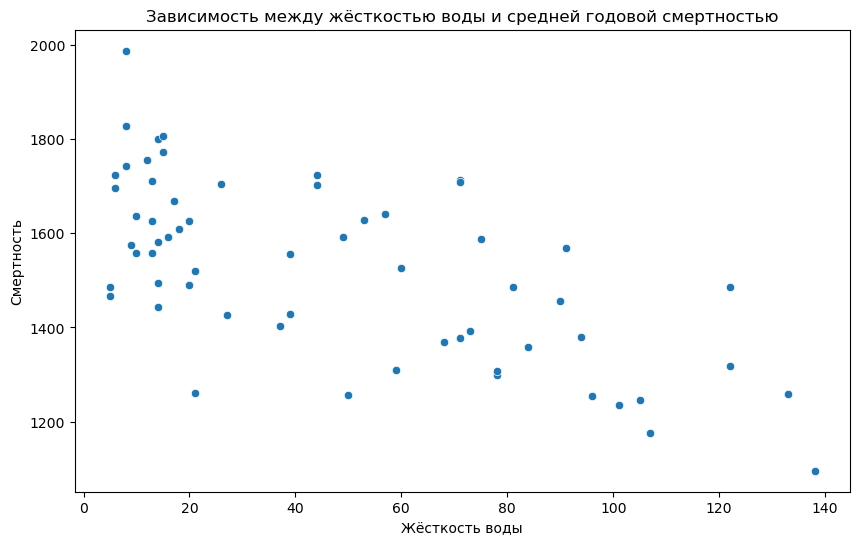

Коэффициент корреляции Пирсона: -0.6548486232042465
Коэффициент корреляции Спирмена: -0.6316646189166502
Коэффициент детерминации: 0.4288267193124974


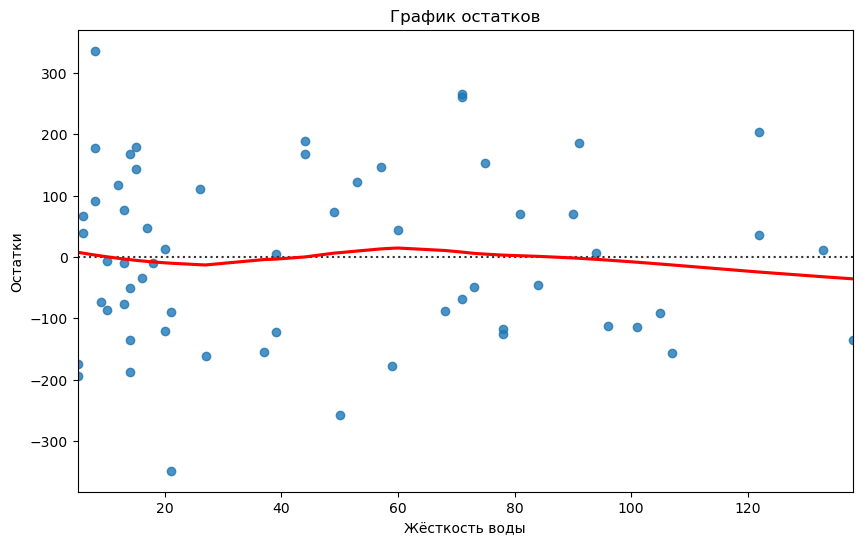

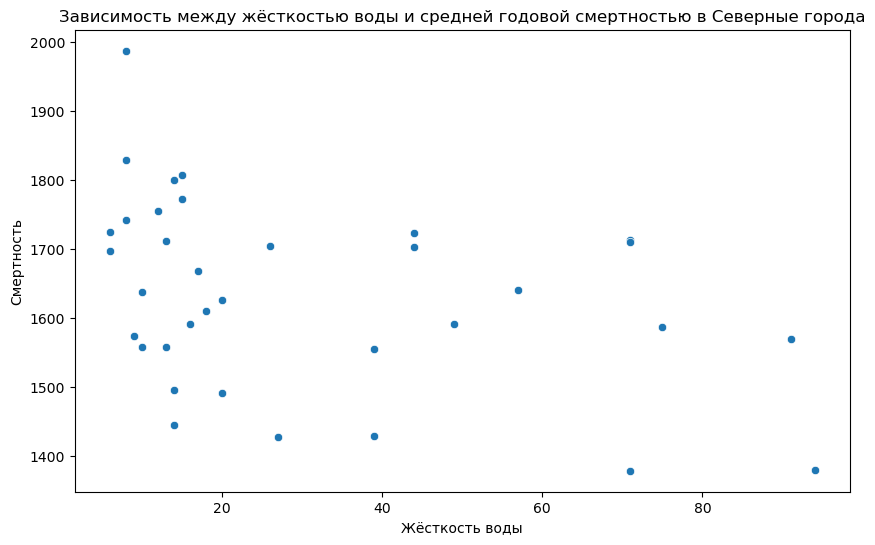

Коэффициент корреляции Пирсона (Северные города): -0.36859783832887183
Коэффициент корреляции Спирмена (Северные города): -0.4042078956511175
Коэффициент детерминации (Северные города): 0.1358643664207173


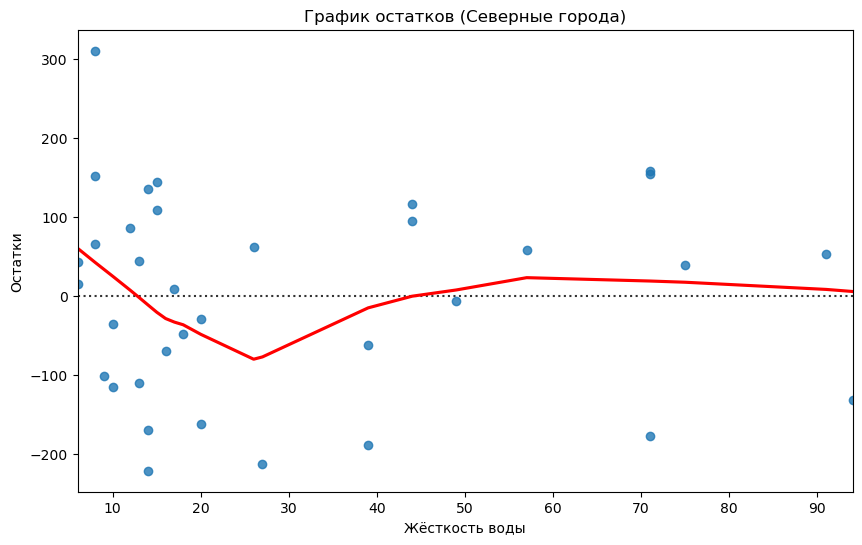

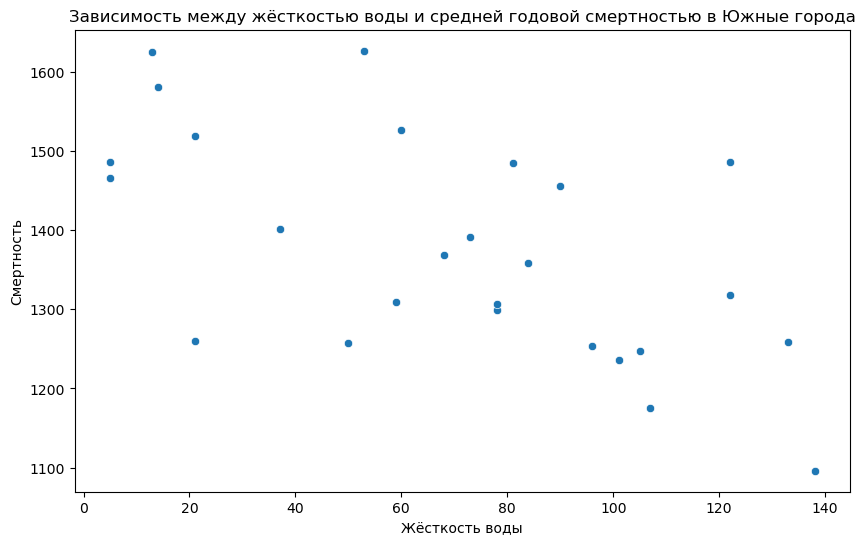

Коэффициент корреляции Пирсона (Южные города): -0.6021532715484157
Коэффициент корреляции Спирмена (Южные города): -0.5957229185013566
Коэффициент детерминации (Южные города): 0.3625885624364601


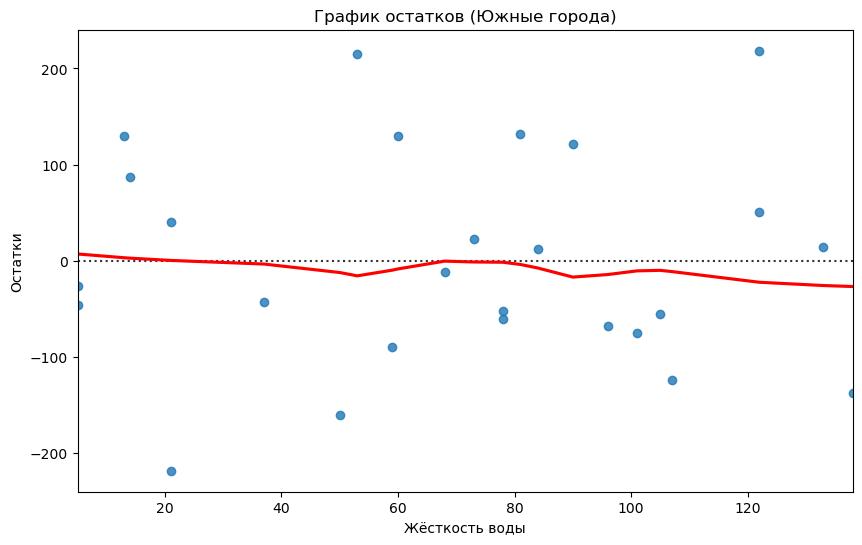

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr

# Загрузка данных из датасета
data = pd.read_csv("D:/water.csv")

# Анализ данных для всех городов
# Точечный график
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hardness', y='mortality', data=data)
plt.title('Зависимость между жёсткостью воды и средней годовой смертностью')
plt.xlabel('Жёсткость воды')
plt.ylabel('Смертность')
plt.show()

# Коэффициенты корреляции Пирсона и Спирмена
pearson_corr, _ = pearsonr(data['hardness'], data['mortality'])
spearman_corr, _ = spearmanr(data['hardness'], data['mortality'])

print(f'Коэффициент корреляции Пирсона: {pearson_corr}')
print(f'Коэффициент корреляции Спирмена: {spearman_corr}')

# Модель линейной регрессии
X = data[['hardness']]
y = data['mortality']
model = LinearRegression()
model.fit(X, y)

# Коэффициент детерминации
r2 = r2_score(y, model.predict(X))
print(f'Коэффициент детерминации: {r2}')

# Остатки
residuals = y - model.predict(X)

# График остатков
plt.figure(figsize=(10, 6))
sns.residplot(x=data['hardness'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('График остатков')
plt.xlabel('Жёсткость воды')
plt.ylabel('Остатки')
plt.show()

# Анализ данных для северных и южных городов отдельно
# Данные: северные и южные города
north_cities = data[data['location'] == 'North']
south_cities = data[data['location'] == 'South']

# Анализ для каждой группы
def analyze_data(df, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='hardness', y='mortality', data=df)
    plt.title(f'Зависимость между жёсткостью воды и средней годовой смертностью в {title}')
    plt.xlabel('Жёсткость воды')
    plt.ylabel('Смертность')
    plt.show()

    pearson_corr, _ = pearsonr(df['hardness'], df['mortality'])
    spearman_corr, _ = spearmanr(df['hardness'], df['mortality'])
    print(f'Коэффициент корреляции Пирсона ({title}): {pearson_corr}')
    print(f'Коэффициент корреляции Спирмена ({title}): {spearman_corr}')

    X = df[['hardness']]
    y = df['mortality']
    model = LinearRegression()
    model.fit(X, y)
    r2 = r2_score(y, model.predict(X))
    print(f'Коэффициент детерминации ({title}): {r2}')

    residuals = y - model.predict(X)
    plt.figure(figsize=(10, 6))
    sns.residplot(x=df['hardness'], y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.title(f'График остатков ({title})')
    plt.xlabel('Жёсткость воды')
    plt.ylabel('Остатки')
    plt.show()

analyze_data(north_cities, 'Северные города')
analyze_data(south_cities, 'Южные города')